In [39]:
import os
import sys
import config as cfg
import time
import copy

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import itertools

from datetime import datetime  
from datetime import timedelta 

#from fastai.old.fastai.imports import *
#from fastai.old.fastai.structured import *

%matplotlib inline
sns.set()

In [2]:
PROJECT_NAME = 'TimeSeriesKb'
PROJECT_START_DATE = '28/06/19' #ENGLISH DATE FORMAT
PROJECT_END_DATE = '' #ENGLISH DATE FORMAT

In [3]:
#ROOT, PROJECT_ROOT, PACKAGE_ROOT = config.configure_environment('Local',PROJECT_NAME)

config = cfg.privateConfig(cfg.OS, PROJECT_NAME)

The haribo package provides the following functions to use in Jupyter:

set_screen_width() - sets cells to be 90% of screen width

show_df(dataFrame, allRows = False) - shows all columns of a dataFrame when displayed

pickle_it(data, path) - safely pickles a file

from_pickle_jar(path) - safely loads a pickled file



In [4]:
from CodeCandy.haribo import jupyter as candy

# Import data from CSV

In [5]:
dfRaw = pd.read_csv(
    os.path.join(config.PROJECT_ROOT, 'Materials', 'raw.csv'),
    parse_dates=['Date', 'ClassTime'],
    dayfirst=True,
    index_col='Date', 
    dtype={
        'AcademicYear':np.int32,
        'Week': np.int32,
        'HeadCount': np.int32,
        'PaidCount': np.int32,
    }
)

dfRaw['year'] = [d.year for d in dfRaw.index]
dfRaw['month'] = [d.strftime('%b') for d in dfRaw.index]

In [6]:
candy.show_df(dfRaw.iloc[200:300])

,AcademicYear,Week,HeadCount,PaidCount,CashTaken,ClassTime,Venue,Event,Social,year,month
Date,,,,,,,,,,,
2015-03-10,2014,19,37,37,144.3,6pm,Sugden,NaN,NaN,2015,Mar
2015-03-12,2014,19,29,29,113.1,7pm,Trinity,NaN,NaN,2015,Mar
2015-03-17,2014,20,41,41,159.9,6pm,Sugden,NaN,NaN,2015,Mar
2015-03-19,2014,20,23,23,89.7,7pm,Trinity,Grading,NaN,2015,Mar
2015-04-14,2014,21,33,33,128.7,6pm,Sugden,First Class,NaN,2015,Apr
2015-04-16,2014,21,5,5,19.5,7pm,Trinity,NaN,NaN,2015,Apr
2015-04-21,2014,22,22,22,85.8,6pm,Sugden,NaN,NaN,2015,Apr
2015-04-23,2014,22,21,21,81.9,6pm,Trinity,Time Change,NaN,2015,Apr
2015-04-28,2014,23,25,25,97.5,6pm,Sugden,NaN,NaN,2015,Apr


(100, 11)


# Time Series EDA

## Plot time series

Text(0, 0.5, 'Number of Students')

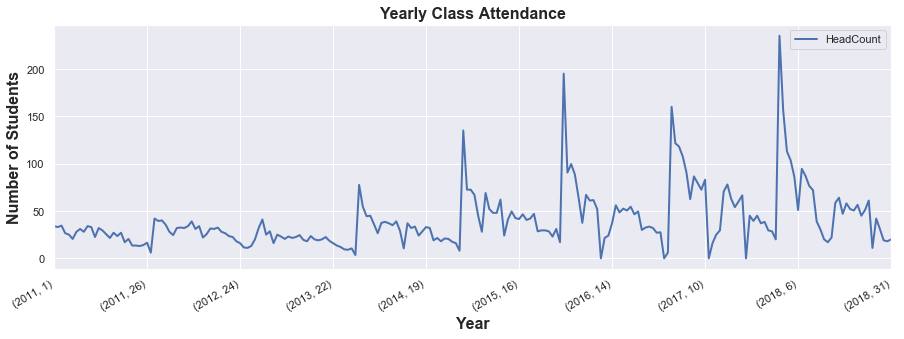

In [7]:
dfRaw[dfRaw['Event']!='No Class'][['AcademicYear','Week','HeadCount']].groupby(by=['AcademicYear','Week']).mean().plot(figsize=(15,5),linewidth=2,subplots=True)
plt.title('Yearly Class Attendance',fontsize=16,fontweight='bold')
plt.xlabel('Year',fontsize=16,fontweight='bold')
plt.ylabel('Number of Students',fontsize=16,fontweight='bold')

## Fill in the missing dates between classes

Text(0, 0.5, 'Number of Students')

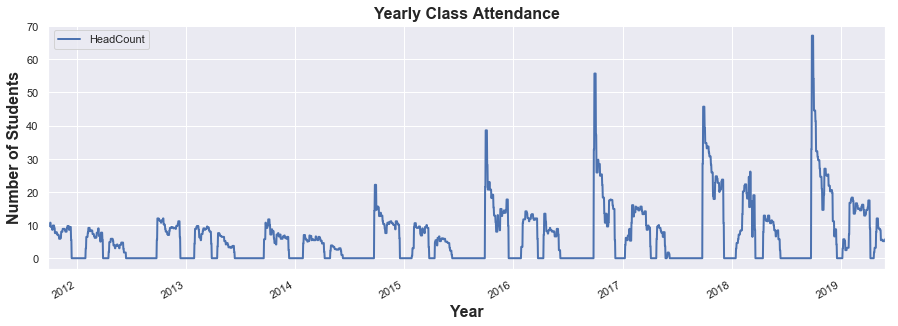

In [8]:
idx = pd.date_range(dfRaw.index.min(), dfRaw.index.max())
dfRaw.reindex(idx,fill_value=0)[['HeadCount']].rolling(window=7).mean().plot(figsize=(15,5),linewidth=2,subplots=True)
plt.title('Yearly Class Attendance',fontsize=16,fontweight='bold')
plt.xlabel('Year',fontsize=16,fontweight='bold')
plt.ylabel('Number of Students',fontsize=16,fontweight='bold')

## Look at the year on year seasonal patterns

Is the club growing or stagnating

Text(0, 0.5, 'Student number')

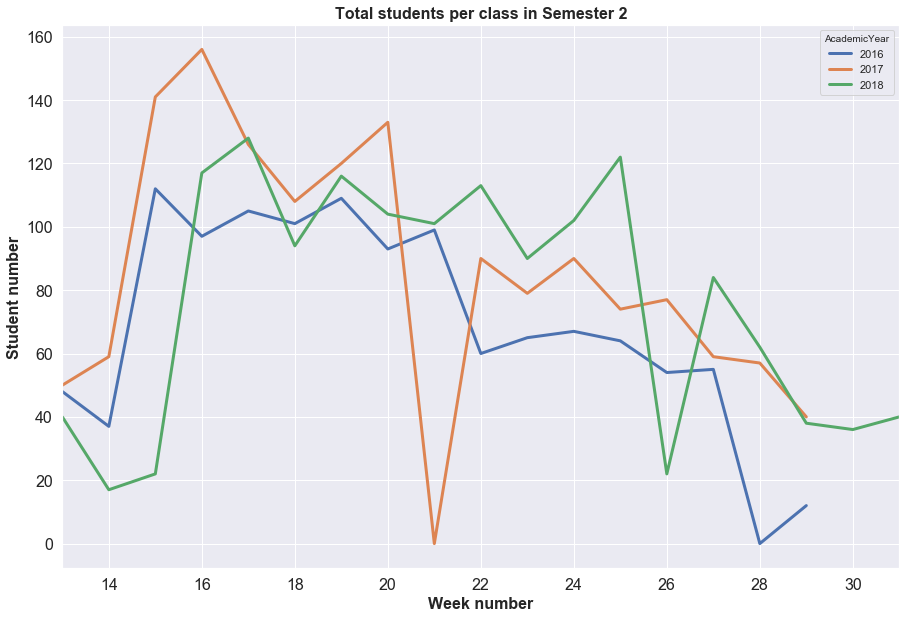

In [9]:
pd.pivot_table(dfRaw[(dfRaw['AcademicYear']>2015) & (dfRaw['Week'] >12)], index='Week', columns='AcademicYear',
                    values='HeadCount', aggfunc='sum').plot(figsize=(15,10),fontsize=16, linewidth = 3)

plt.title('Total students per class in Semester 2',fontsize=16,fontweight='bold')
plt.xlabel('Week number',fontsize=16,fontweight='bold')
plt.ylabel('Student number',fontsize=16,fontweight='bold')

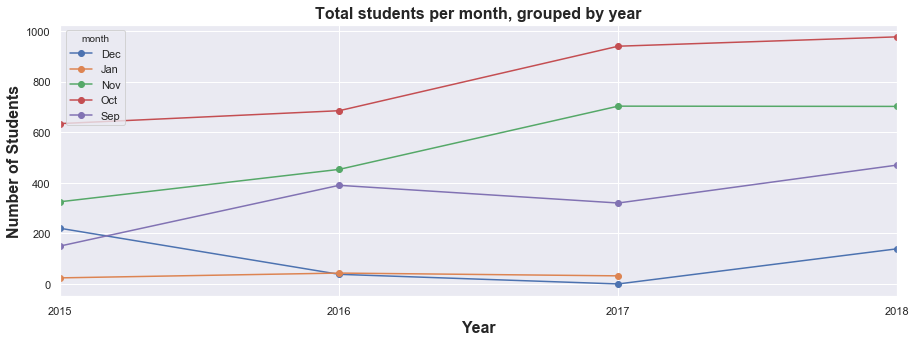

In [10]:
pd.pivot_table(dfRaw[(dfRaw['AcademicYear']>=2015) & (dfRaw['Week'] >=1) & (dfRaw['Week'] <=12)], index='AcademicYear', columns='month',
                    values='HeadCount', aggfunc='sum').plot(marker='o',figsize=(15,5))
'''
pd.pivot_table(dfRaw[(dfRaw['AcademicYear']>=2015) & (dfRaw['Week'] >=1) & (dfRaw['Week'] <=12)], index='AcademicYear', columns='month',
                    values='HeadCount', aggfunc='sum').plot(figsize=(15,5))

'''

plt.title('Total students per month, grouped by year',fontsize=16,fontweight='bold')
plt.xlabel('Year',fontsize=16,fontweight='bold')
plt.ylabel('Number of Students',fontsize=16,fontweight='bold')
plt.xticks([2015,2016,2017,2018]);

In [11]:
dfRaw.head()

,AcademicYear,Week,HeadCount,PaidCount,CashTaken,ClassTime,Venue,Event,Social,year,month
Date,,,,,,,,,,,
2011-09-27,2011,1,26,0,0.0,6pm,Sugden,First Class,NaN,2011,Sep
2011-09-29,2011,1,42,0,0.0,6.30pm,Sugden,NaN,NaN,2011,Sep
2011-10-04,2011,2,33,33,128.7,6pm,Sugden,NaN,NaN,2011,Oct
2011-10-06,2011,2,33,33,128.7,6.30pm,Sugden,NaN,NaN,2011,Oct
2011-10-11,2011,3,27,27,105.3,6pm,Sugden,NaN,NaN,2011,Oct


In [12]:
list(dfRaw.columns)

['AcademicYear',
 'Week',
 'HeadCount',
 'PaidCount',
 'CashTaken',
 'ClassTime',
 'Venue',
 'Event',
 'Social',
 'year',
 'month']

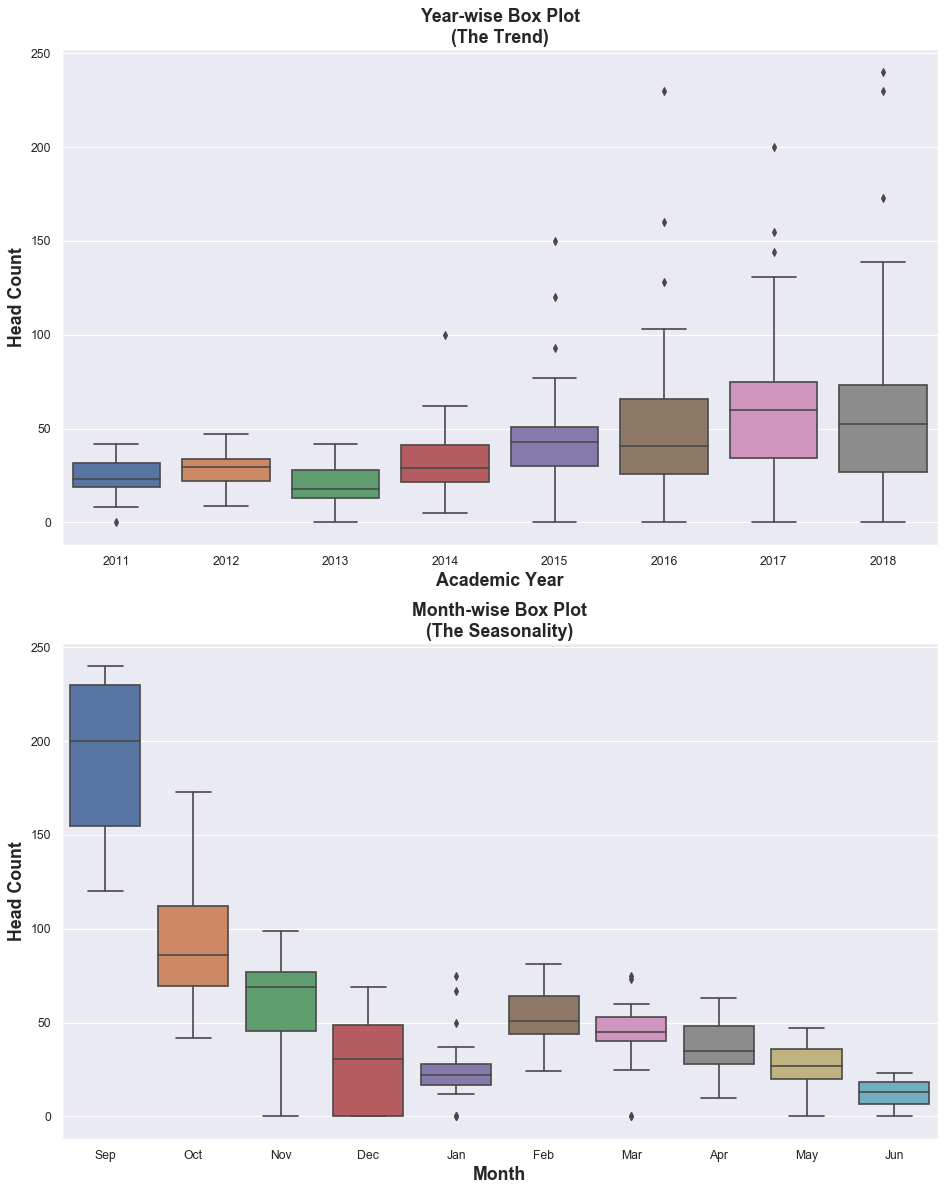

In [13]:
# Prepare data

years = dfRaw['year'].unique()

# Draw Plot
fig, axes = plt.subplots(2, 1, figsize=(12,15), dpi= 80)
sns.boxplot(x='AcademicYear', y='HeadCount', data=dfRaw, ax=axes[0])
sns.boxplot(x='month', y='HeadCount', data=dfRaw[dfRaw['AcademicYear']>=2015])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=16, fontweight='bold'); 
axes[0].set_xlabel('Academic Year', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Head Count', fontsize=16, fontweight='bold')

axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Month', fontsize=16, fontweight='bold')
axes[1].set_ylabel('Head Count', fontsize=16, fontweight='bold')

plt.tight_layout()

Text(0, 0.5, 'Total number of students')

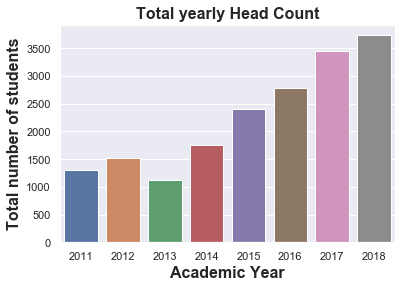

In [14]:
#dfRaw[['AcademicYear','HeadCount']].groupby('AcademicYear').sum().plot(kind='bar',figsize = (10,5))
sns.barplot(data = dfRaw[['AcademicYear','HeadCount']].groupby('AcademicYear',as_index=False).sum(),x='AcademicYear',y='HeadCount')
plt.title('Total yearly Head Count',fontsize=16,fontweight='bold')
plt.xlabel('Academic Year',fontsize=16,fontweight='bold')
plt.ylabel('Total number of students',fontsize=16,fontweight='bold')

# ARIMA Modelling

## Prepare the data

In [15]:
dfARIMA = copy.deepcopy(dfRaw)
dfARIMA=dfARIMA.reindex(idx,fill_value=0)[['HeadCount']].resample('W').sum().fillna(0)#.rolling(window=7).mean().resample('W').mean().fillna(0)

In [16]:
dfARIMA.isnull().sum()

HeadCount    0
dtype: int64

In [17]:
candy.show_df(dfARIMA.head())

,HeadCount
2011-10-02,68
2011-10-09,66
2011-10-16,69
2011-10-23,53
2011-10-30,50


(5, 1)


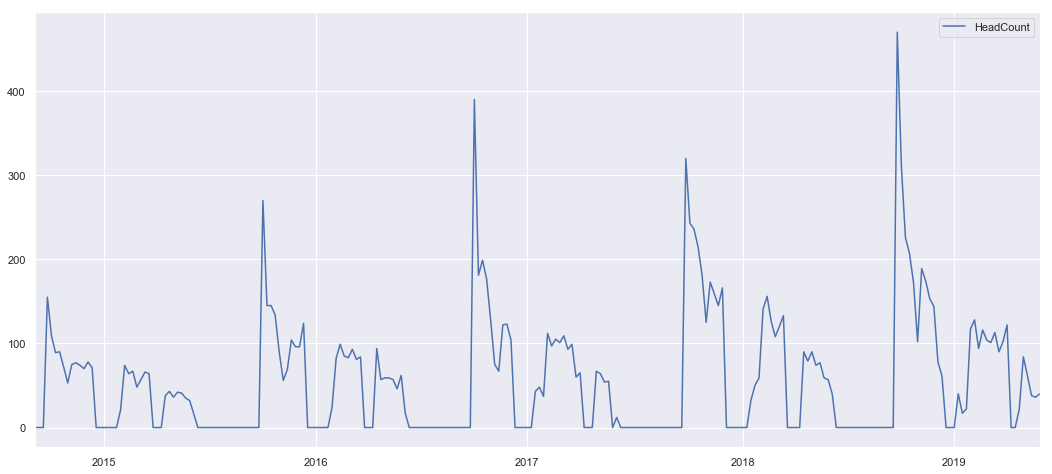

In [18]:
y = dfARIMA[dfARIMA.index >='2014-09-01']
y.plot(figsize = (18,8))

## Test for Seasonality

Text(0, 0.5, 'Seasonality')

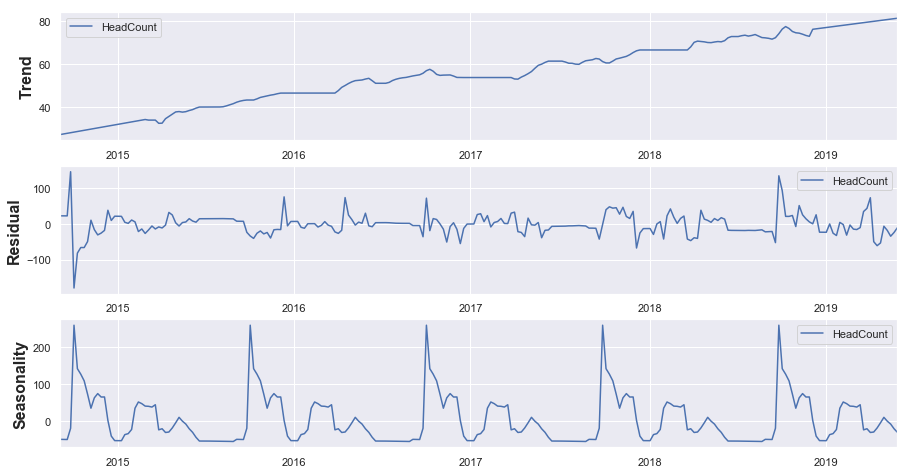

In [19]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive', extrapolate_trend='freq')
#decomposition.plot()


fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
decomposition.trend.plot(ax=ax1)
ax1.set_ylabel('Trend',fontsize=16,fontweight='bold')
decomposition.resid.plot(ax=ax2)
ax2.set_ylabel('Residual',fontsize=16,fontweight='bold')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonality',fontsize=16,fontweight='bold')

## Look at the detrended data

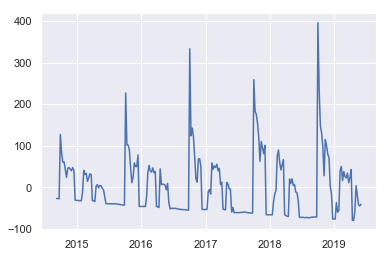

In [20]:
plt.plot(y.values -decomposition.trend)

## Look at the deseasoned data

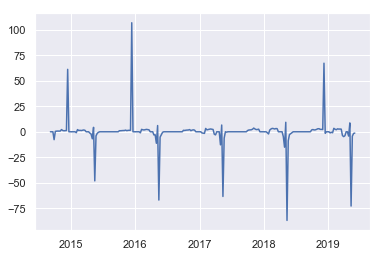

In [21]:
result_mul = sm.tsa.seasonal_decompose(y, model='additive', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = y.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)

## Look at the autocorrelation of the data

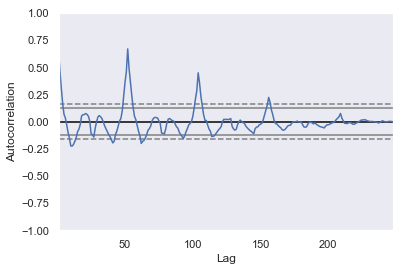

In [22]:
pd.plotting.autocorrelation_plot(y.values.tolist())

## Test for stationarity

In [23]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(y.HeadCount, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(y.HeadCount, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -7.217651213707578
p-value: 2.1521273554144935e-10
Critial Values:
   1%, -3.457105309726321
Critial Values:
   5%, -2.873313676101283
Critial Values:
   10%, -2.5730443824681606

KPSS Statistic: 0.272732
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/anaconda3/envs/general/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


## Calculate differencing required (d term)

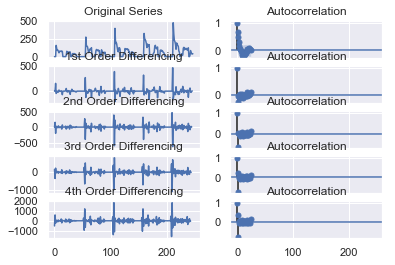

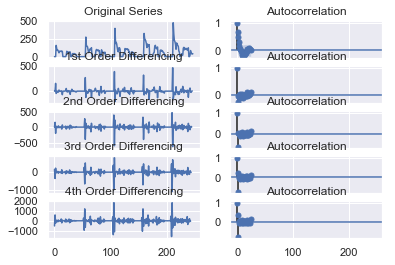

In [24]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Original Series
fig, axes = plt.subplots(5, 2, sharex=True)
axes[0, 0].plot(y.HeadCount.values); axes[0, 0].set_title('Original Series')
plot_acf(y.HeadCount, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y.HeadCount.diff().dropna().values); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y.HeadCount.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(y.HeadCount.diff().diff().dropna().values); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y.HeadCount.diff().diff().dropna(), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(y.HeadCount.diff().diff().diff().dropna().values); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(y.HeadCount.diff().diff().diff().dropna(), ax=axes[3, 1])

# 4th Differencing
axes[4, 0].plot(y.HeadCount.diff().diff().diff().diff().dropna().values); axes[4, 0].set_title('4th Order Differencing')
plot_acf(y.HeadCount.diff().diff().diff().diff().dropna(), ax=axes[4, 1])





In [25]:
result = adfuller(y.HeadCount.diff().dropna().values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(y.HeadCount.diff().dropna().values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -9.475523502364865
p-value: 3.9993152613884e-16
Critial Values:
   1%, -3.457664132155201
Critial Values:
   5%, -2.8735585105960224
Critial Values:
   10%, -2.5731749894132916

KPSS Statistic: 0.040221
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/anaconda3/envs/general/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


## Calcultaing the AR term (p)

(0, 2)

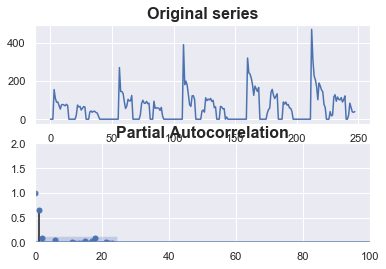

In [26]:
fig, axes = plt.subplots(2, 1, sharex=False)
axes[0].plot(y.HeadCount.dropna().values); axes[0].set_title('Original series',fontsize=16,fontweight='bold')
axes[1].set(ylim=(0,5))
plot_pacf(y.HeadCount.dropna(), ax=axes[1])
axes[1].set_title('Partial Autocorrelation',fontsize=16,fontweight='bold')
axes[1].set_xlim([0, 100])
axes[1].set_ylim([0,2])

p term of 0 or 1

## Calculating the MA term (q)

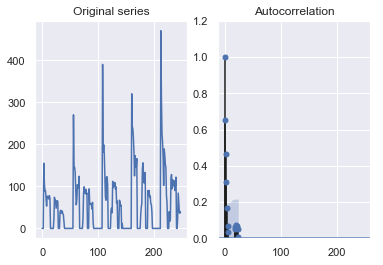

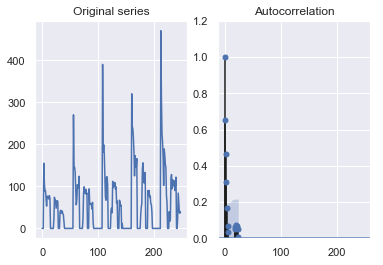

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(y.HeadCount.dropna().values); axes[0].set_title('Original series')
axes[1].set(ylim=(0,1.2))
plot_acf(y.HeadCount.dropna().dropna(), ax=axes[1])

q term of 3

## Fit a model using the calculated terms

### Use statsmodel SARIMAX model 

In [28]:
mod = sm.tsa.statespace.SARIMAX(y[y.index <='2018-10-21'],
                                order=(1, 0, 0),
                                seasonal_order=(0, 1, 0, 52),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2494      0.052      4.784      0.000       0.147       0.352
sigma2      1394.3093     86.811     16.061      0.000    1224.162    1564.456


In [29]:
mod = sm.tsa.statespace.SARIMAX(y[y.index <='2018-10-21'],
                                order=(1, 2, 3),
                                seasonal_order=(1, 1, 1, 52),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
results = mod.fit()
print(results.summary().tables[1])
print(results.aic)

/anaconda3/envs/general/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/envs/general/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/anaconda3/envs/general/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9789      0.042    -23.184      0.000      -1.062      -0.896
ma.L1         -0.9983      2.319     -0.431      0.667      -5.543       3.546
ma.L2         -0.9982      2.599     -0.384      0.701      -6.093       4.096
ma.L3          0.9993      2.090      0.478      0.633      -3.098       5.096
ar.S.L52      -0.3251      1.109     -0.293      0.770      -2.500       1.849
ma.S.L52       0.2064      1.120      0.184      0.854      -1.989       2.402
sigma2      1353.6432   2813.829      0.481      0.630   -4161.361    6868.647
1658.9340893787512


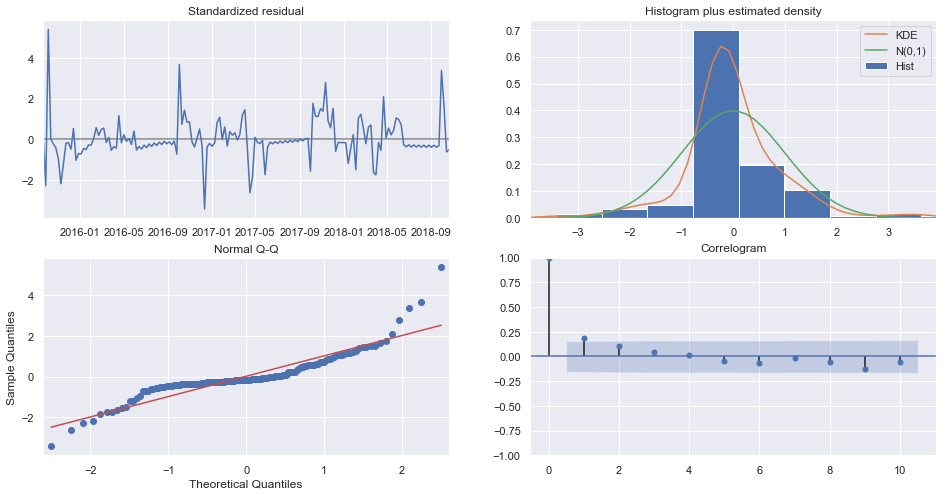

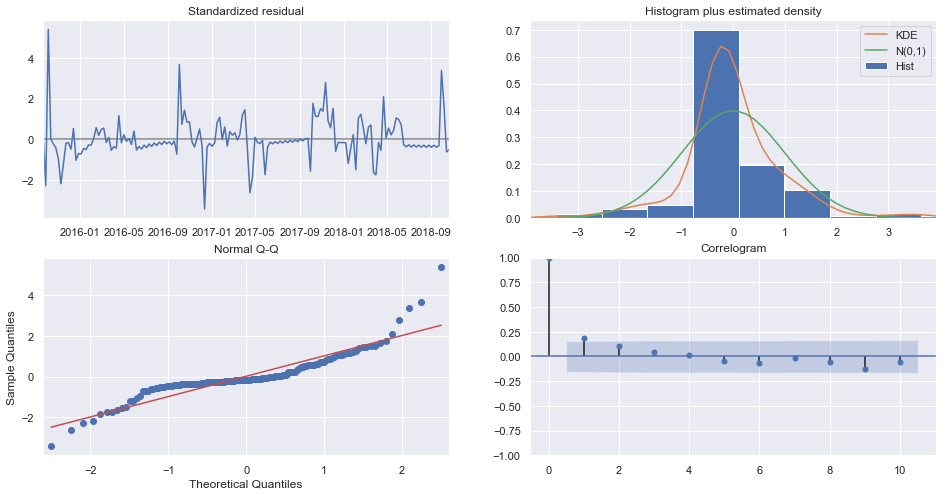

In [30]:
results.plot_diagnostics(figsize=(16, 8))

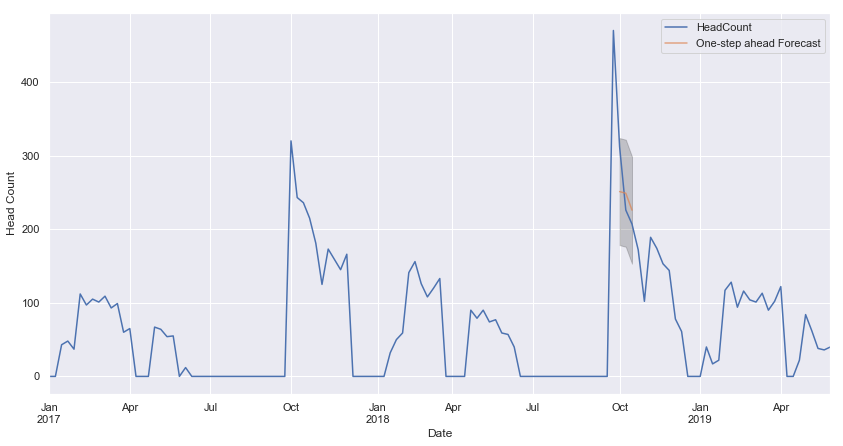

In [31]:
pred = results.get_prediction(start=pd.to_datetime('2018-10-07'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Head Count')
plt.legend()


In [32]:
y_forecasted = pred.predicted_mean.values
y_truth = y['2018-10-07':].values
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 27481.98
The Root Mean Squared Error of our forecasts is 165.78


### Use Stats model ARIMA model

In [33]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(y.HeadCount, order=(0,1,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.HeadCount   No. Observations:                  247
Model:                 ARIMA(0, 1, 3)   Log Likelihood               -1353.484
Method:                       css-mle   S.D. of innovations             57.989
Date:                Thu, 18 Jul 2019   AIC                           2716.968
Time:                        11:15:05   BIC                           2734.515
Sample:                    09-14-2014   HQIC                          2724.033
                         - 06-02-2019                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0477      1.704      0.028      0.978      -3.293       3.388
ma.L1.D.HeadCount    -0.3147      0.069     -4.589      0.000      -0.449      -0.180
ma.L2.D.HeadCount    -0.

Text(0.5, 1.0, 'Density')

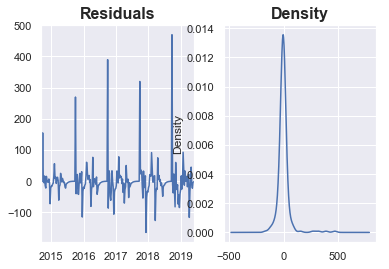

In [34]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0],legend=False)
ax[0].set_title('Residuals',fontsize=16,fontweight='bold')
residuals.plot(kind='kde', title='Density', ax=ax[1],legend=False)
ax[1].set_title('Density',fontsize=16,fontweight='bold')

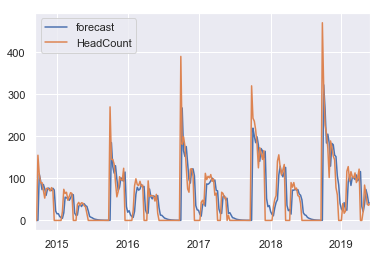

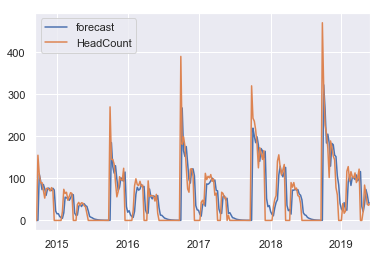

In [35]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)

In [36]:
y_forecasted = pred.predicted_mean.values
y_truth = y['2018-10-07':].values
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 27481.98
The Root Mean Squared Error of our forecasts is 165.78


## Forecast - out of sample forecasting

### SARIMAX model

In [58]:
mod = sm.tsa.statespace.SARIMAX(y[y.index <='2018-10-07'],
                                order=(1, 0, 0),
                                seasonal_order=(0, 1, 0, 52),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
results = mod.fit()

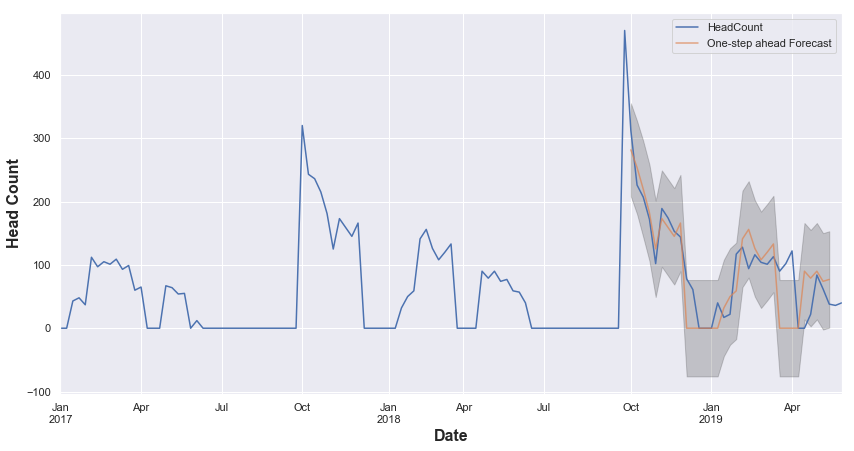

In [59]:
start_date = pd.to_datetime('2018-10-07')
pred = results.get_prediction(start=start_date,end=start_date + timedelta(weeks=32), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date', fontsize=16,fontweight='bold')
ax.set_ylabel('Head Count', fontsize=16,fontweight='bold')
plt.legend()

In [73]:
y_forecasted = pred.predicted_mean.values
y_truth = y['2018-10-07':predictions.index.max()].values
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 11598.28
The Root Mean Squared Error of our forecasts is 107.7


In [74]:
startdate = pd.to_datetime('2018-10-07')
predictions = pd.DataFrame()
pred_ci = pd.DataFrame()

for week in range(0,35):
    date = startdate +timedelta(weeks=week)
    
    mod = sm.tsa.statespace.SARIMAX(y[y.index <date],
                                order=(1, 0, 0),
                                seasonal_order=(0, 1, 0, 52),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
    results = mod.fit()
    prediction = results.get_forecast(steps=1)
    predictions = pd.concat([predictions, pd.DataFrame(prediction.predicted_mean)])
    pred_ci = pd.concat([pred_ci,prediction.conf_int()])

predictions.rename(columns={0:'Forecast'},inplace=True)


In [75]:
predictions.head()

,Forecast
2018-10-07,278.410620
2018-10-14,253.732811
2018-10-21,212.507909
2018-10-28,179.004461
2018-11-04,122.752886


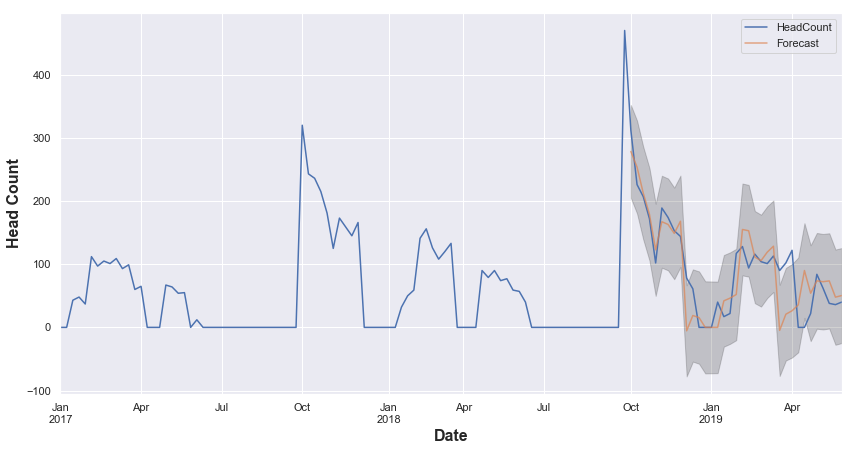

In [76]:
ax = y['2017':].plot(label='observed')
predictions.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date', fontsize=16,fontweight='bold')
ax.set_ylabel('Head Count', fontsize=16,fontweight='bold')
plt.legend()


In [77]:
y_forecasted = predictions.values
y_truth = y['2018-10-07':predictions.index.max()].values
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 1750.46
The Root Mean Squared Error of our forecasts is 41.84


In [ ]:
outputs = pd.DataFrame(pd.concat([predictions,y['2018-10-07':predictions.index.max()]],axis=1))
outputs.rename(columns={'Forecast':'Forecasted'},inplace=True)
outputs['Square Error'] = (outputs['Forecasted']-outputs['HeadCount'])**2
outputs['mse'] = outputs['Square Error'].expanding().mean()
outputs['RMSE'] = outputs['mse']**(1/2)
outputs['difference'] = (outputs['HeadCount']-outputs['Forecasted'])/outputs['HeadCount']*100
outputs['RMSE'].plot(figsize=(15,5))
plt.xlabel('Month', fontsize=16,fontweight='bold')
plt.ylabel('RMSE', fontsize=16,fontweight='bold')

### ARIMA model

In [ ]:
start_date = pd.to_datetime('2018-09-30')
train = y[y.index<= start_date]
test = y.loc[start_date+timedelta(weeks=1): start_date+timedelta(weeks=10)]

model = ARIMA(train.HeadCount, order=(0,1,3))
fitted = model.fit(disp=0)
print(model_fit.summary())

# Forecast
fc, se, conf = fitted.forecast(10, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

### Auto ARIMA

In [ ]:
import pmdarima as pm

In [ ]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=52,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(train)
plt.plot(train.index,smodel.predict_in_sample())
smodel.

In [ ]:
# Forecast
n_periods = 52
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='W')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
fig = plt.figure(figsize=(20,10))
plt.plot(y)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of attendance")

# Prophet Model

In [ ]:
from fbprophet import Prophet

In [ ]:
dfRaw.head()

In [ ]:
dfProphet = copy.deepcopy(y)
dfProphet.reset_index(inplace=True)
dfProphet.rename(columns={'index':'ds','HeadCount':'y'},inplace=True)
dfProphet.head()

## Implement simple Prophet - no holidays

In [ ]:
prediction_size = 28
train_df = dfProphet[:-prediction_size]

In [ ]:
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods = prediction_size,freq='W')
forecast = m.predict(future)
forecast.head()

In [ ]:
m.plot(forecast)
plt.plot(y,color='orange',alpha=.6)

In [ ]:
forecast

In [ ]:
m.plot_components(forecast)